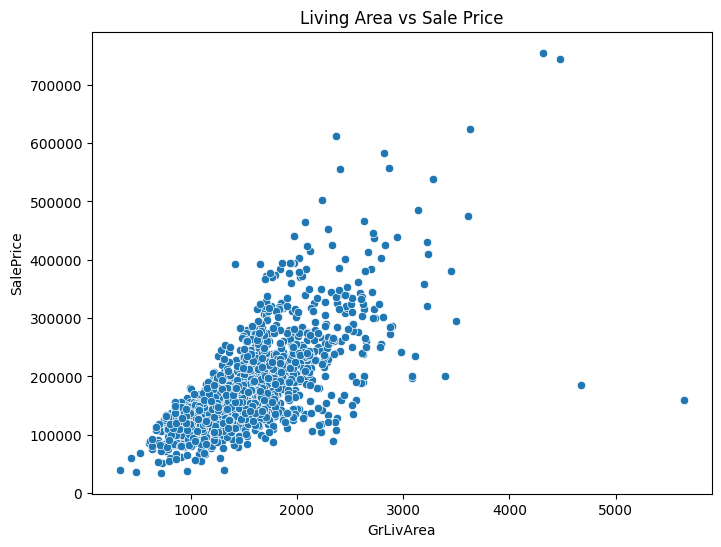

R² Score: 0.5543
MSE: 3418946311.1808


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load Data
data_path = '../data/train.csv'
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found at {data_path}")
data = pd.read_csv(data_path)

# Check if required columns exist
required_columns = ['GrLivArea', 'SalePrice']
if not all(col in data.columns for col in required_columns):
    raise KeyError(f"Missing required columns: {required_columns}")

# Data Cleaning
data = data[required_columns].dropna()

# Visualization
visuals_dir = '../visuals'
os.makedirs(visuals_dir, exist_ok=True)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title("Living Area vs Sale Price")
plt.savefig(os.path.join(visuals_dir, 'living_area_vs_price.png'))
plt.show()

# Feature Selection
X = data[['GrLivArea']]
y = data['SalePrice']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")

# Handle poor model performance
if r2 < 0:
    print("Warning: The model is performing poorly (negative R²). Consider revising the features or model.")